# Import Modules

In [1]:
import pandas as pd

import utils

# Load Data

In [5]:
target_vegetable = "トマト"
train_size = 4000

In [6]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [7]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=100)

training loss = 1.005460262298584
test loss = 0.8436861634254456
training loss = 0.35576319694519043
test loss = 7.317223072052002
training loss = 0.12555675208568573
test loss = 0.9889737367630005
training loss = 0.09948756545782089
test loss = 0.5265410542488098
training loss = 0.09064238518476486
test loss = 0.6160942912101746
training loss = 0.08798015862703323
test loss = 0.5889952778816223
training loss = 0.08723066002130508
test loss = 0.706746518611908
training loss = 0.09014970809221268
test loss = 0.5614235997200012
training loss = 0.08708027005195618
test loss = 0.6673486828804016
training loss = 0.08627687394618988
test loss = 0.6119651198387146


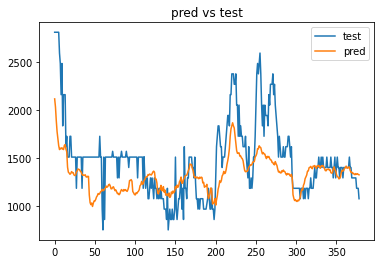

In [8]:
utils.plot_prediction(pred_y, test, ss)

# Terminal Score

In [4]:
utils.get_terminal_score()

training loss = 1.0012322664260864
test loss = 0.6688863039016724
training loss = 0.4717033803462982
test loss = 0.6233575344085693
training loss = 0.24428781867027283
test loss = 2.401975631713867
だいこん: 0.578176736831665
training loss = 0.9971033334732056
test loss = 0.8611893057823181
training loss = 0.3961948752403259
test loss = 6.968116760253906
training loss = 0.2756320834159851
test loss = 1.7127610445022583
にんじん: 0.5072958469390869
training loss = 1.0100514888763428
test loss = 0.4350943863391876
training loss = 0.5441067218780518
test loss = 3.634974241256714
training loss = 0.18209294974803925
test loss = 0.466606467962265
キャベツ: 11.541492462158203
training loss = 1.027873158454895
test loss = 1.7448515892028809
training loss = 0.3684866428375244
test loss = 2.8738853931427
training loss = 0.17349381744861603
test loss = 6.0986857414245605
レタス: 1.4559662342071533
training loss = 1.0031369924545288
test loss = 1.2551376819610596
training loss = 0.39149126410484314
test loss = 5